In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
january2013=pd.read_csv("datasets/yellow_tripdata_2013-01.csv")

Removing all rows with 0 tips

Removing all coordinates that do not bound with the world -90 < latitude +90      -180 < longitude < +180

Bounding pickup_lat between 40.61 and 40.91

Bounding pickup_long between -74.06 and -73.77

Removing all coordinates = 0

In [2]:
january2013tips = pd.DataFrame(january2013)
january2013tips = january2013tips.loc[(january2013tips['tip_amount'] > 0.0) & (january2013tips['pickup_latitude'] != 0) & (january2013tips['pickup_longitude'] != 0) & (january2013tips['pickup_longitude'] > -74.06) & (january2013tips['pickup_longitude'] < -73.77) & (january2013tips['pickup_latitude'] > 40.61) &  (january2013tips['pickup_latitude'] < 40.91)]
january2013tips = january2013tips.reset_index()
january2013tips = january2013tips.drop('index', 1)

In [3]:
filterDateandTips1 = january2013tips[['pickup_datetime','tip_amount']]

In [4]:
filterDateandTips1 = filterDateandTips1.sort_values('pickup_datetime')
filterDateandTips1 = filterDateandTips1.reset_index()
filterDateandTips1 = filterDateandTips1.drop('index', 1)

In [5]:
hours1 = pd.to_datetime(pd.Series(filterDateandTips1['pickup_datetime']))
filterDateandTips1['hours'] = hours1.dt.hour
avgtipsperhour = filterDateandTips1.groupby('hours').tip_amount.mean()

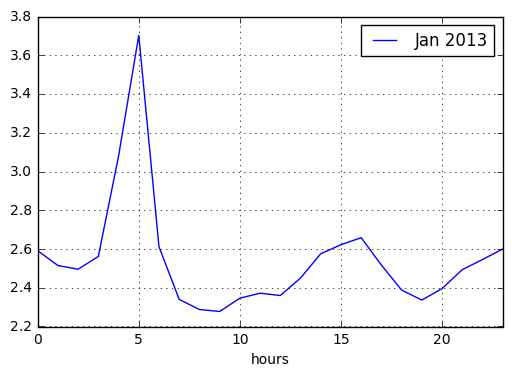

In [6]:
avgtipsperhour.plot()
plt.grid()
years = ['Jan 2013']
plt.legend(years)

In [7]:
filterDistanceandTips1 = january2013tips[['trip_distance','tip_amount']] # only those who tip 
#filterDistanceandTips1 = january2013[['trip_distance','tip_amount']] # both tips and no tips

In [8]:
filterDistanceandTips1 = filterDistanceandTips1.sort_values('trip_distance')
filterDistanceandTips1 = filterDistanceandTips1.reset_index()
filterDistanceandTips1 = filterDistanceandTips1.drop('index', 1)

avgtipsdistance = filterDistanceandTips1.groupby('trip_distance').tip_amount.mean()

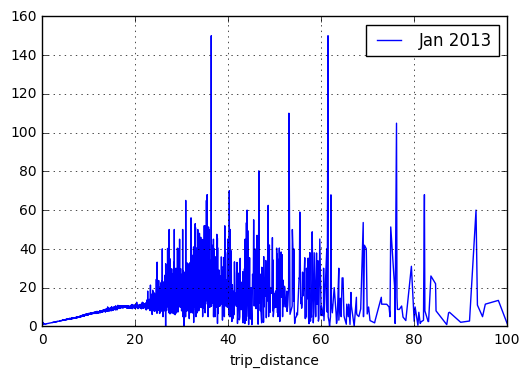

In [9]:
avgtipsdistance.plot()
plt.grid()
years = ['Jan 2013']
plt.legend(years)

In [10]:
january2013tips.head(1)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2013-01-13 10:27:00,2013-01-13 10:35:00,1,2.92,-73.99219,40.723945,1,NaN,-73.966325,40.715732,CRD,11.0,0.0,0.5,2.75,0.0,14.25


In [11]:
january2013pickup = january2013tips['pickup_latitude'].map(str) +','+january2013tips['pickup_longitude'].map(str)
january2013dropoff = january2013tips['dropoff_latitude'].map(str) +','+january2013tips['dropoff_longitude'].map(str)
#january2013loc['dropoff_coord'] = pd.concat(january2013tips['dropoff_longitude'], january2013tips['dropoff_latitude'])

In [12]:
january2013tipsfreq = january2013.loc[(january2013['pickup_latitude'] != 0) & (january2013['pickup_longitude'] != 0) & (january2013['pickup_longitude'] > -74.06) & (january2013['pickup_longitude'] < -73.77) & (january2013['pickup_latitude'] > 40.61) &  (january2013['pickup_latitude'] < 40.91)]

In [13]:
january2013tipsfreq.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2013-01-01 15:11:48,2013-01-01 15:18:10,4,1.0,-73.978165,40.757977,1,N,-73.989840,40.751173,CSH,6.5,0.0,0.5,0.0,0.0,7.0
1,CMT,2013-01-06 00:18:35,2013-01-06 00:22:54,1,1.5,-74.006680,40.731781,1,N,-73.994499,40.750659,CSH,6.0,0.5,0.5,0.0,0.0,7.0
2,CMT,2013-01-05 18:49:41,2013-01-05 18:54:23,1,1.1,-74.004711,40.737770,1,N,-74.009831,40.726000,CSH,5.5,1.0,0.5,0.0,0.0,7.0
3,CMT,2013-01-07 23:54:15,2013-01-07 23:58:20,2,0.7,-73.974600,40.759945,1,N,-73.984737,40.759388,CSH,5.0,0.5,0.5,0.0,0.0,6.0
4,CMT,2013-01-07 23:25:03,2013-01-07 23:34:24,1,2.1,-73.976252,40.748528,1,N,-74.002583,40.747867,CSH,9.5,0.5,0.5,0.0,0.0,10.5


In [14]:
totaltips = january2013tipsfreq[['pickup_datetime','tip_amount']]
totaltips = totaltips.sort_values('pickup_datetime')
totaltips = totaltips.reset_index()
totaltips = totaltips.drop('index', 1)
byhours = pd.to_datetime(pd.Series(totaltips['pickup_datetime']))
totaltips['hours'] = byhours.dt.hour
totalridesperhour = totaltips.groupby('hours').tip_amount.count()

In [15]:
actualtips = january2013tips[['pickup_datetime','tip_amount']]
actualtips = actualtips.sort_values('pickup_datetime')
actualtips = actualtips.reset_index()
actualtips = actualtips.drop('index', 1)
byhours2 = pd.to_datetime(pd.Series(actualtips['pickup_datetime']))
actualtips['hours'] = byhours2.dt.hour
amountthattipped = actualtips.groupby('hours').tip_amount.count()

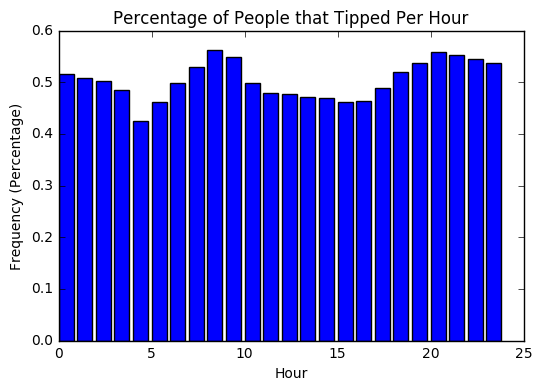

In [16]:
tippercentagebyhour = amountthattipped/totalridesperhour 
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
y = tippercentagebyhour
plt.bar(x,y)
plt.title("Percentage of People that Tipped Per Hour")
plt.xlabel("Hour")
plt.ylabel("Frequency (Percentage)")

In [17]:
january2013tips.shape, january2013tipsfreq.shape, january2013pickup.shape

((7400471, 18), (14496582, 18), (7400471,))